This notebook guides you through the ISLES22 data loading, visualization, and segmentation performance evaluation.

In [1]:
# imports.
import nibabel as nib
import numpy as np
import os
from matplotlib import pyplot as plt

In [ ]:
os.getcwd()

'd:\\Monash\\AIM\\HarDNet\\harmonic-dense-network\\notebooks'

In [2]:
# paths.
isles_data_dir = "d:\\Monash\\AIM\\HarDNet\\harmonic-dense-network\\data"
example_case = 9

# Set images path.
dwi_path = os.path.join(
    isles_data_dir,
    "rawdata",
    "sub-strokecase{}".format("%04d" % example_case),
    "ses-0001",
    "sub-strokecase{}_ses-0001_dwi.nii.gz".format("%04d" % example_case),
)
adc_path = dwi_path.replace("dwi", "adc")
flair_path = dwi_path.replace("dwi", "flair")
mask_path = dwi_path.replace("rawdata", "derivatives").replace("dwi", "msk")

[[-1.99662268e+00 -1.16139270e-01  3.09402542e-03  1.18681320e+02]
 [-1.14229664e-01  1.95268106e+00 -4.17119026e-01 -7.91379242e+01]
 [-2.12011281e-02  4.16591376e-01  1.95601690e+00 -5.76799622e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]] 
 <class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 112 112  73   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [-1.  2.  2.  2.  0.  0.  0.  0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
des

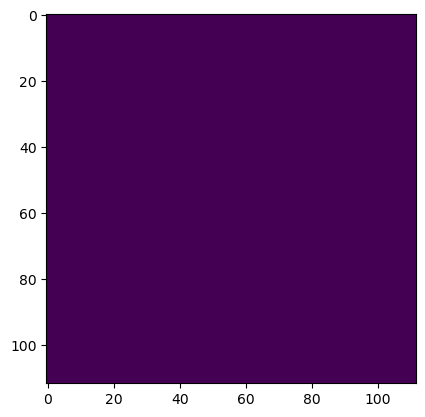

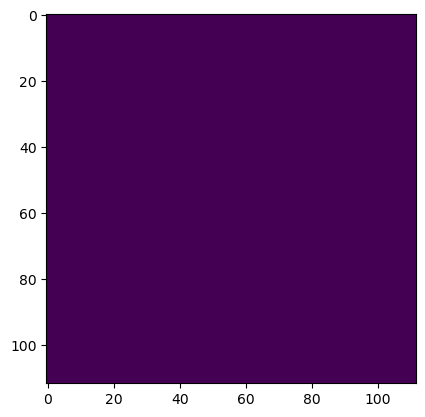

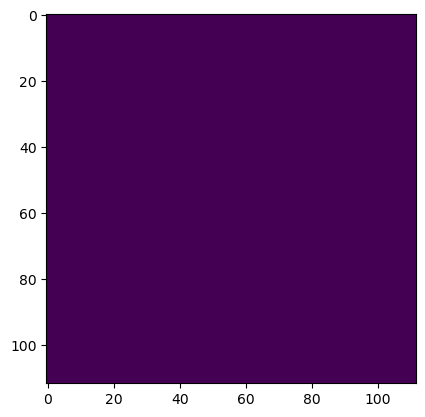

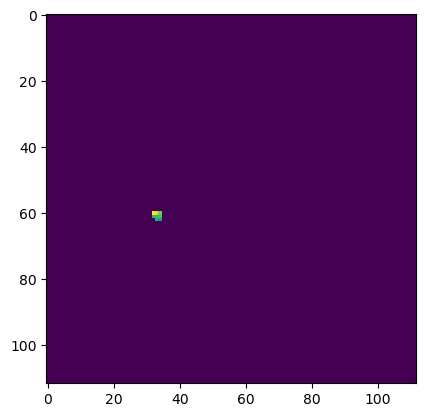

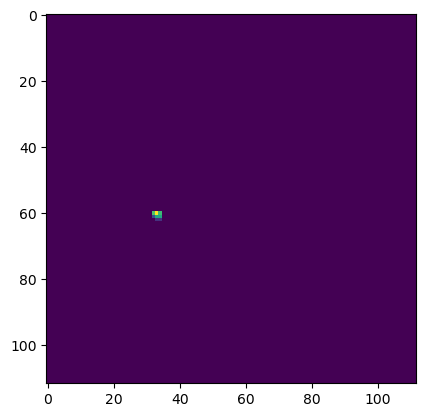

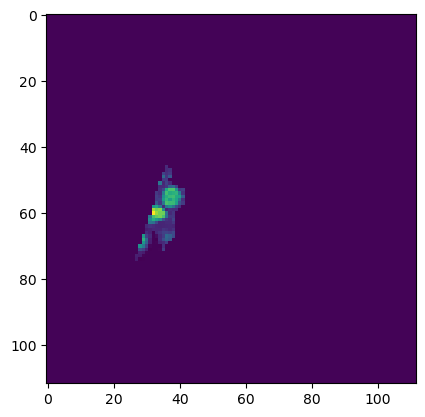

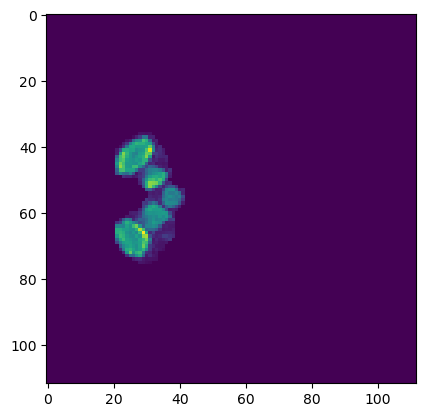

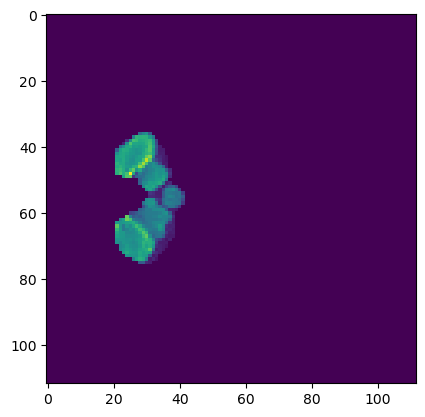

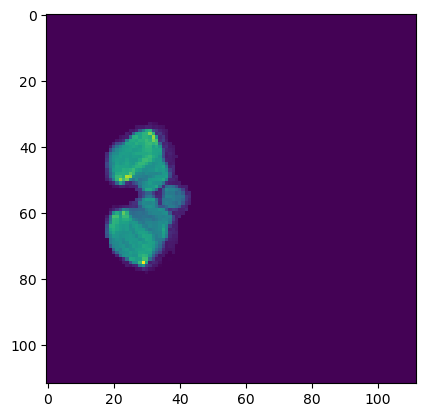

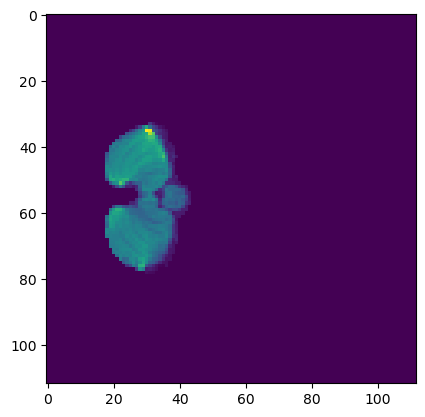

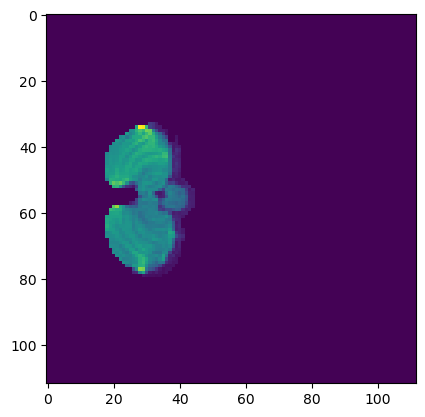

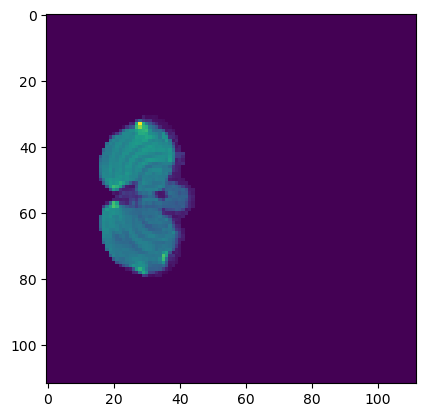

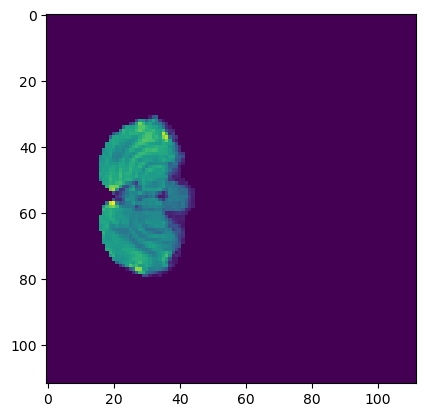

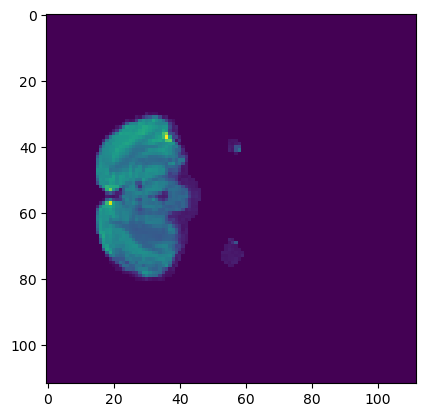

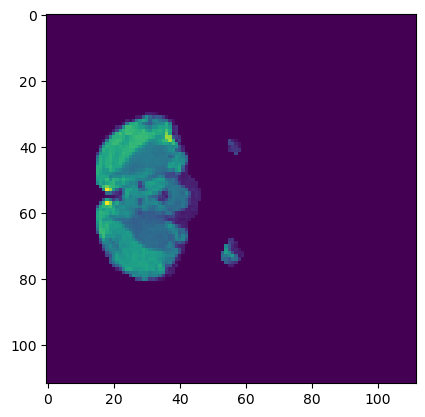

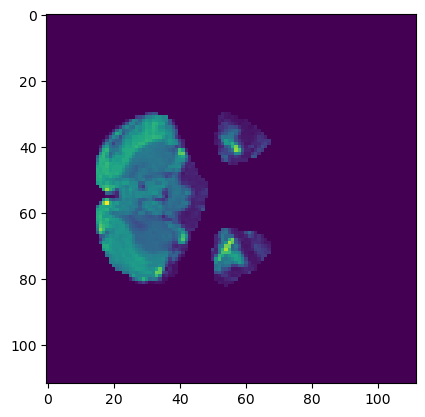

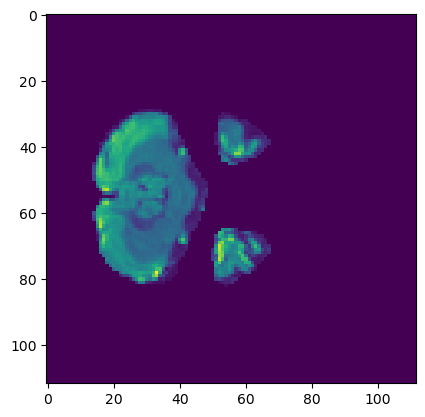

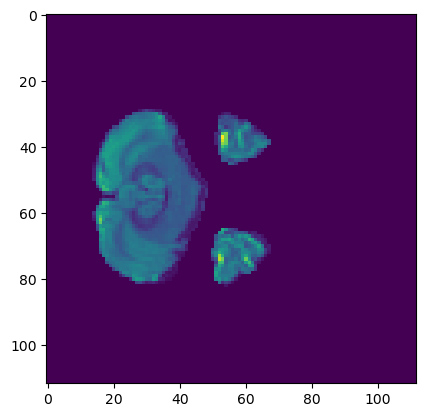

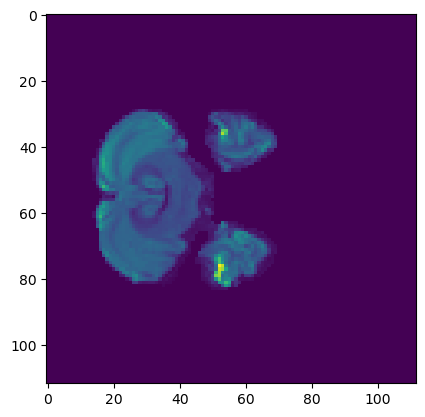

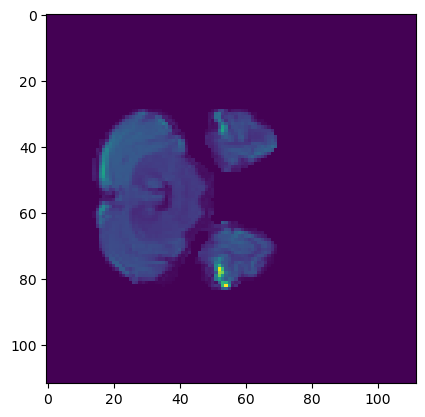

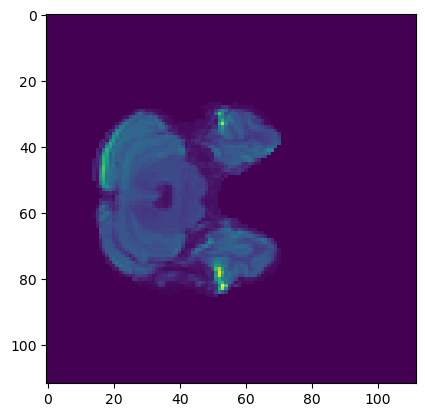

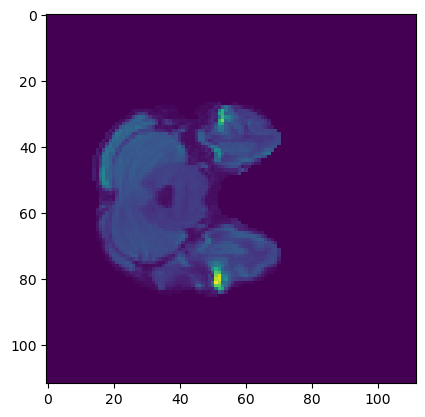

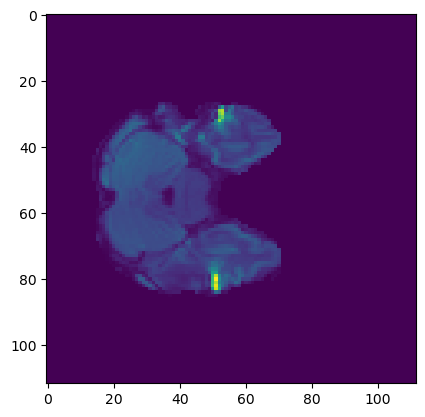

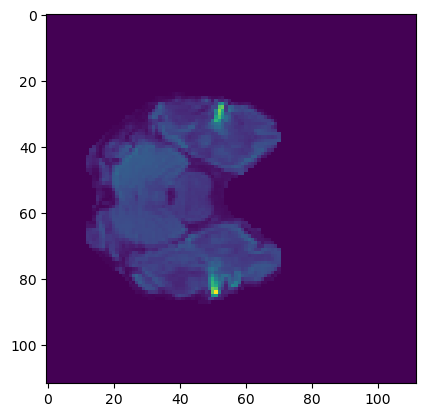

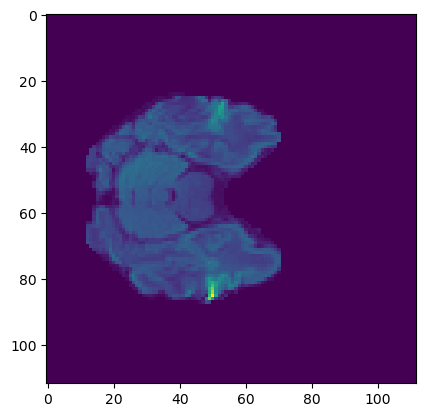

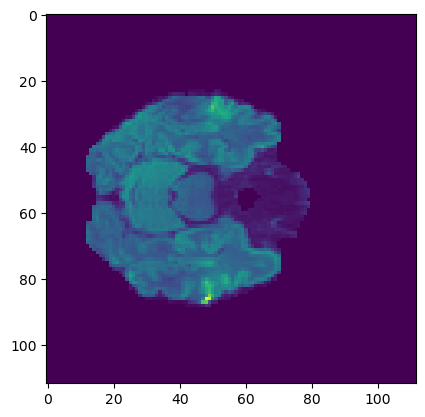

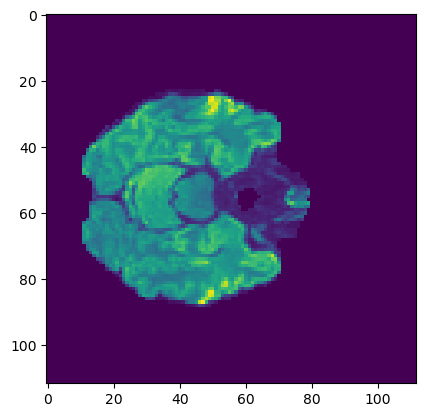

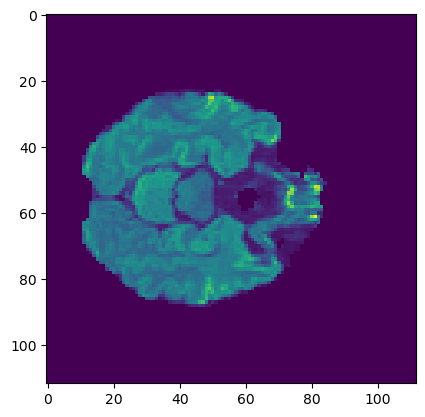

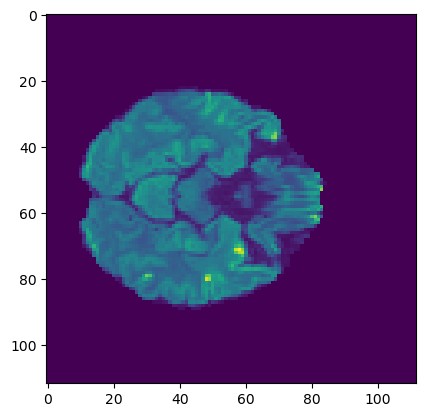

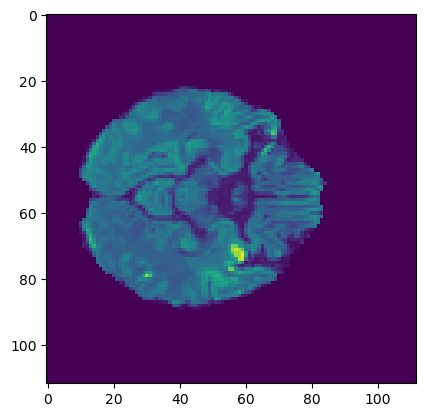

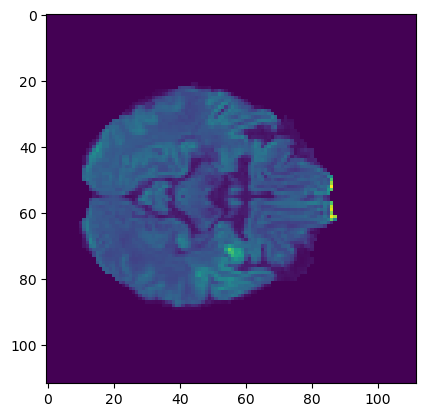

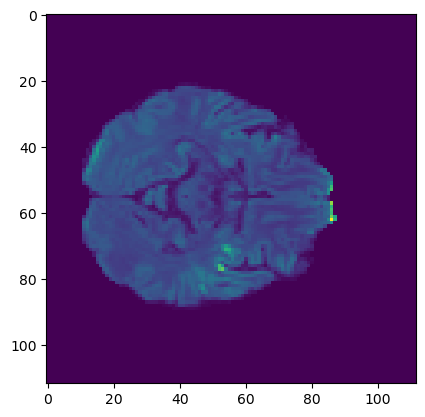

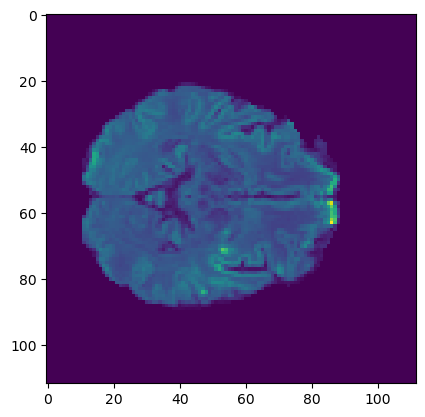

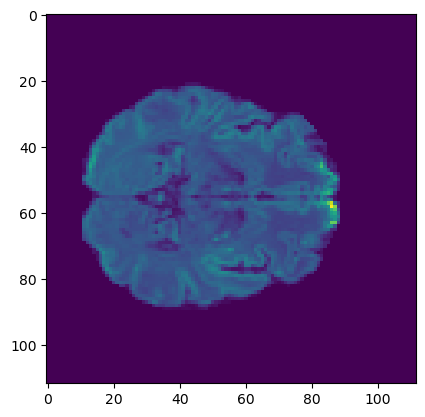

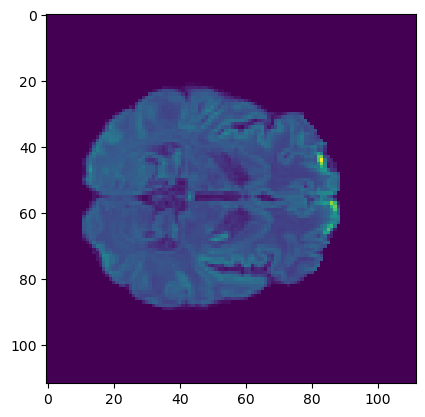

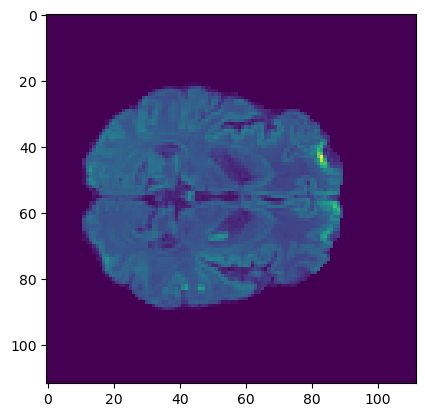

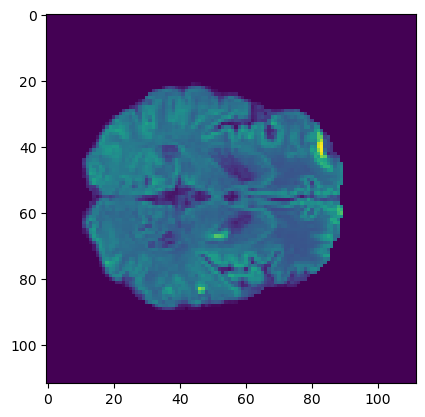

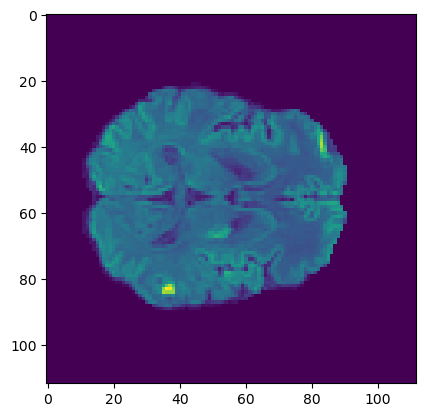

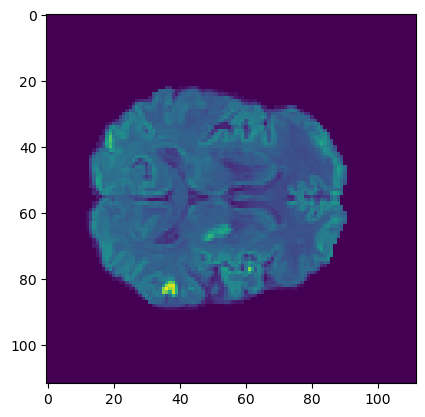

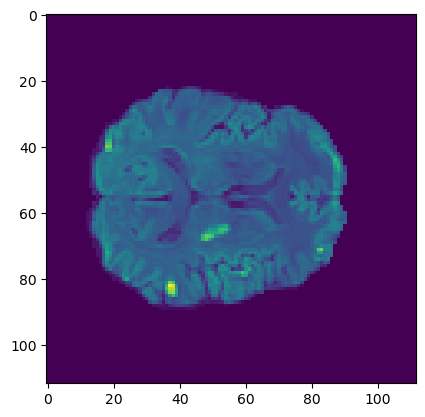

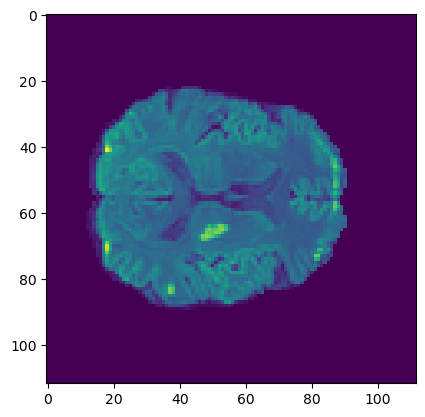

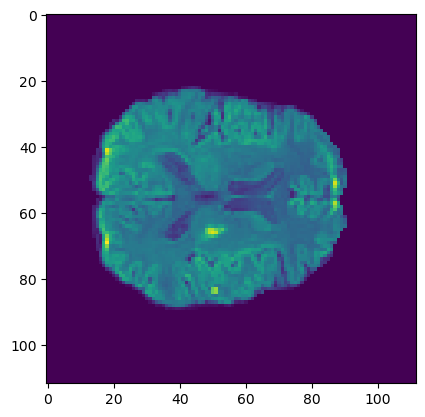

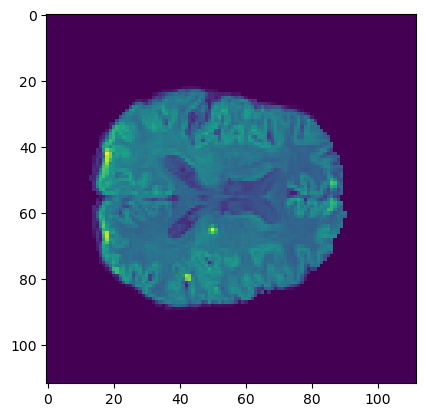

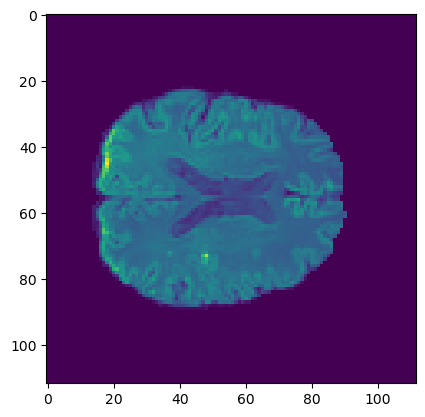

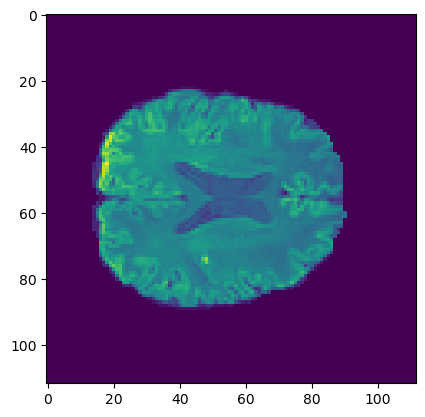

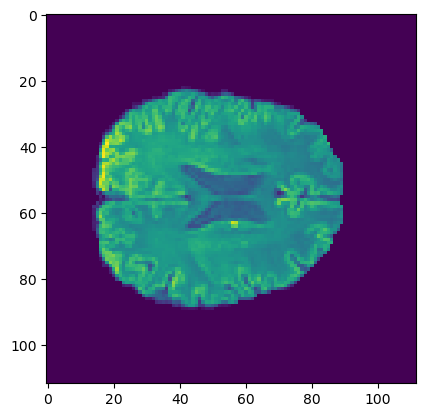

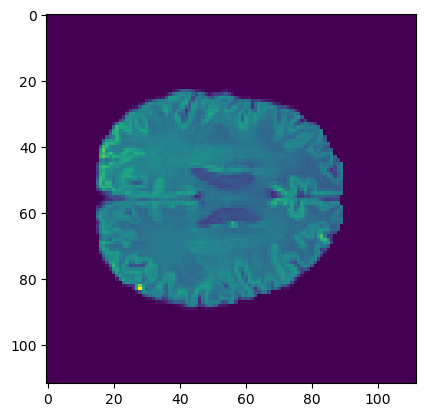

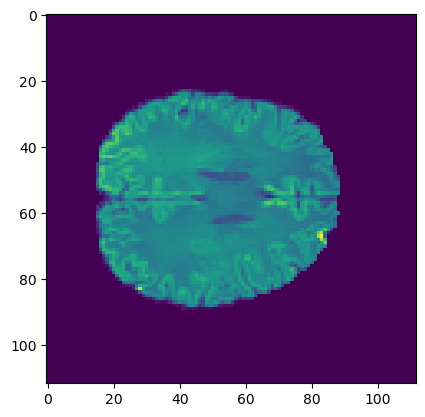

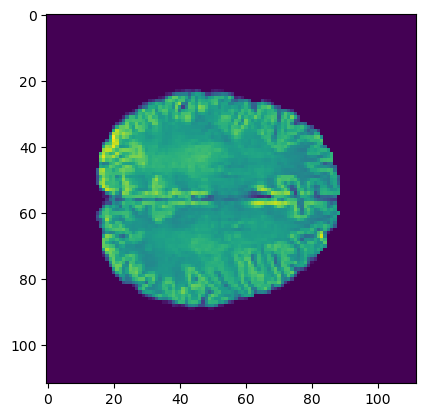

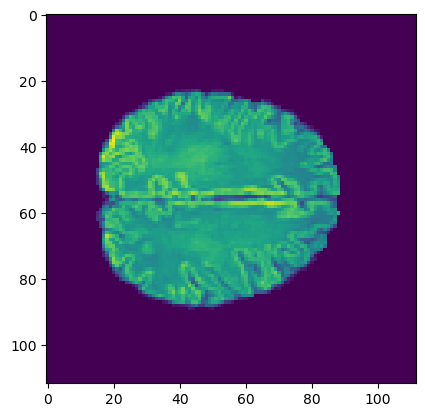

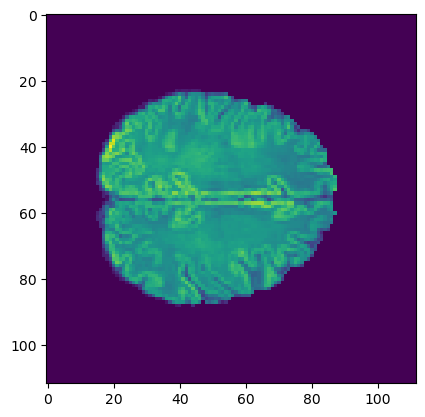

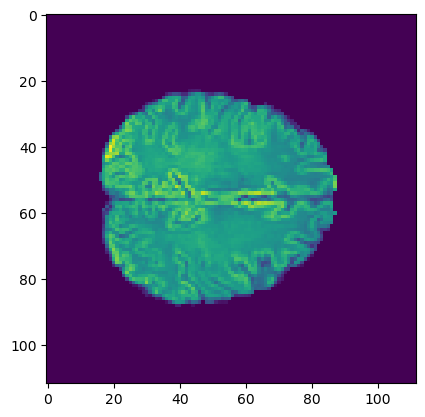

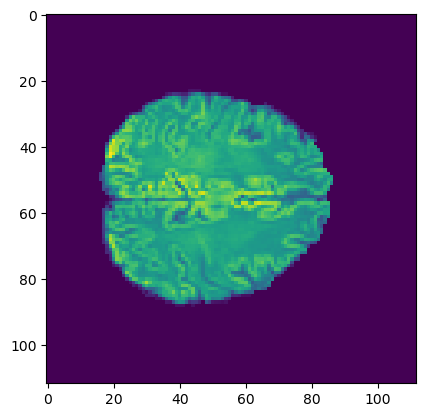

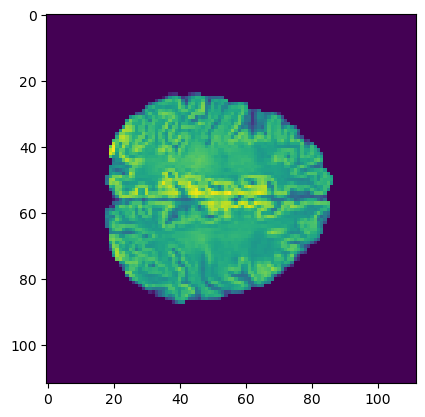

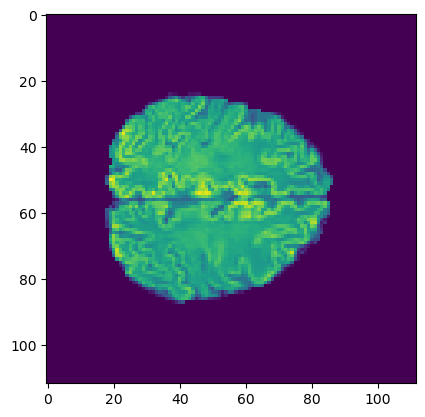

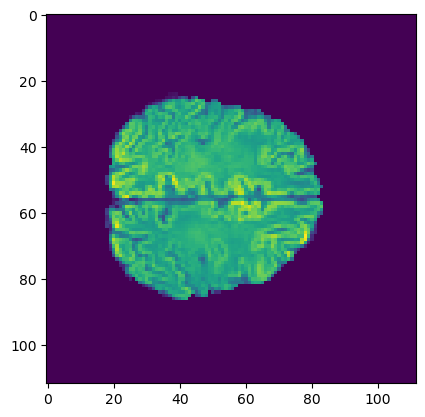

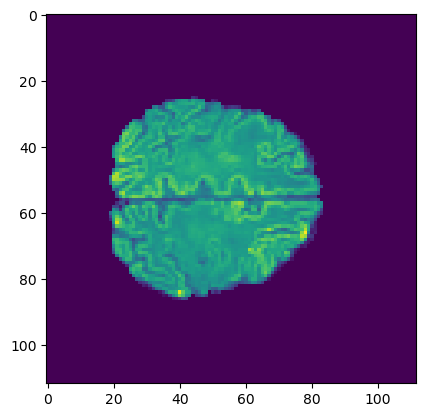

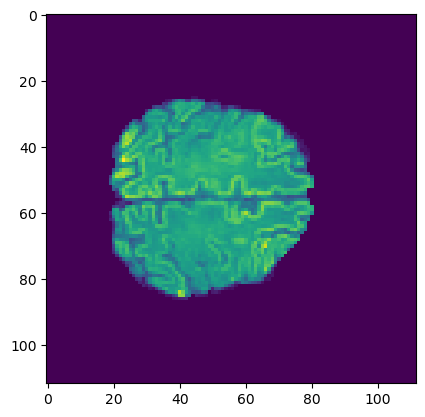

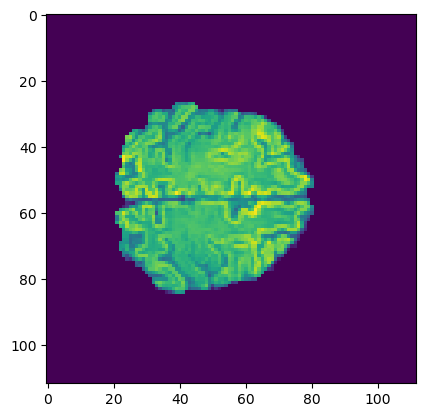

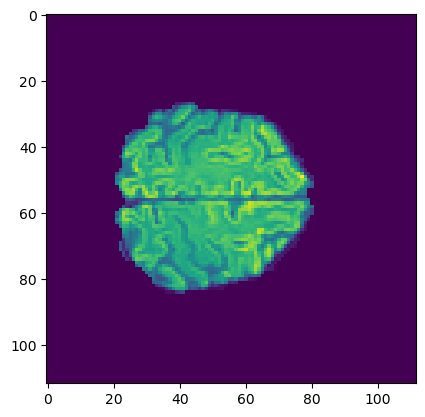

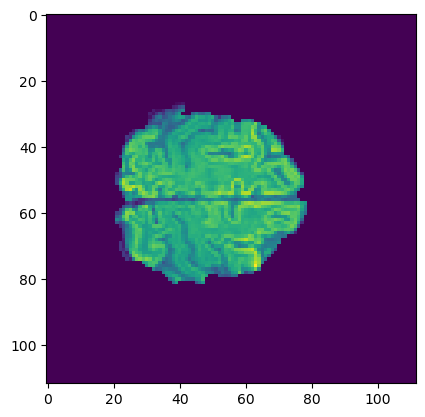

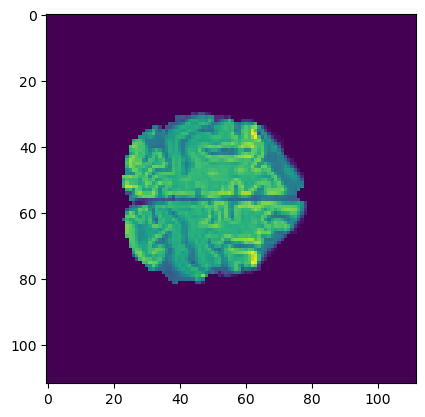

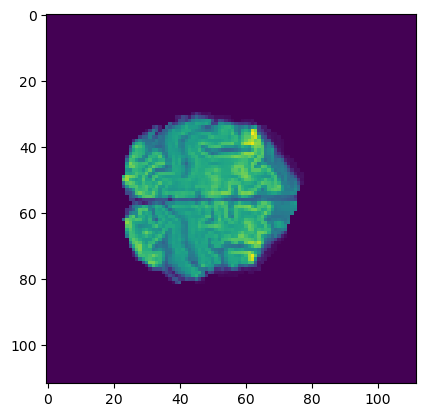

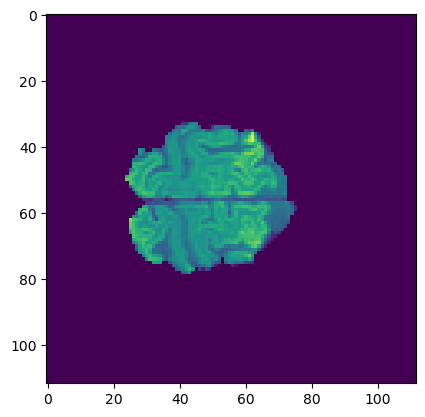

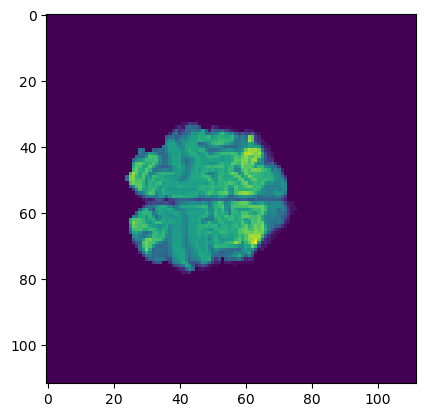

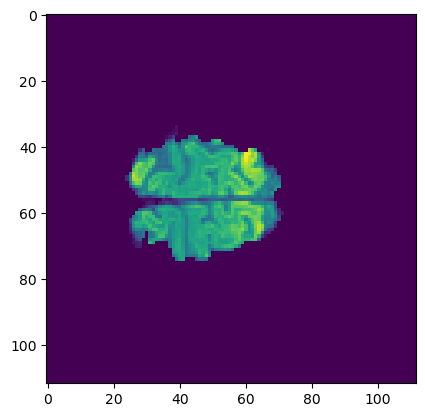

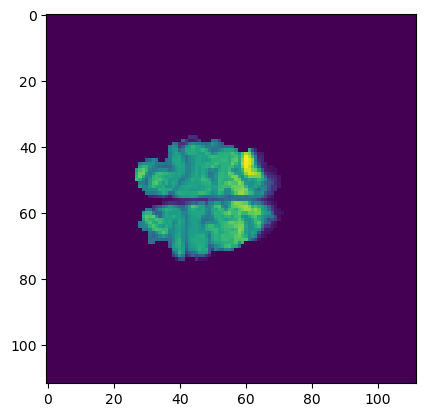

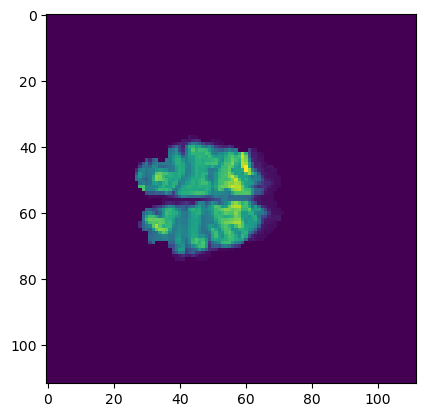

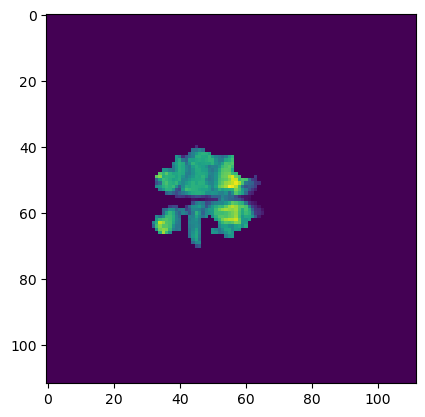

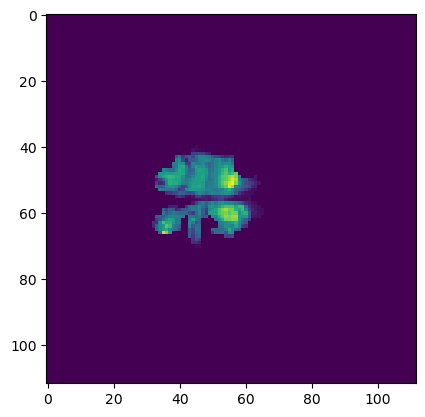

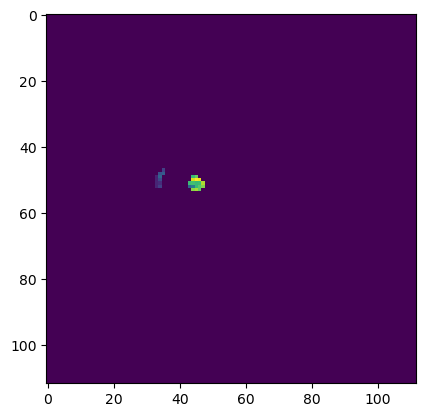

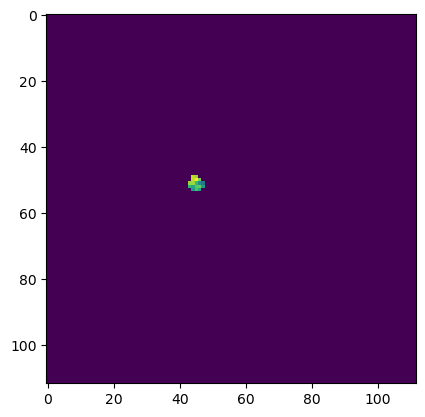

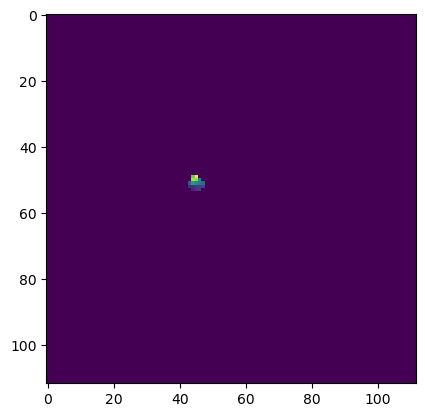

In [4]:
# Change the path to your path
path = dwi_path
my_img  = nib.load(path)
nii_data = my_img.get_fdata()
nii_aff  = my_img.affine
nii_hdr  = my_img.header
print(nii_aff ,'\n',nii_hdr)
print(nii_data.shape)
if(len(nii_data.shape)==3):
   for slice_Number in range(nii_data.shape[2]):
       plt.imshow(nii_data[:,:,slice_Number ])
       plt.show()
if(len(nii_data.shape)==4):
   for frame in range(nii_data.shape[3]):
       for slice_Number in range(nii_data.shape[2]):
           plt.imshow(nii_data[:,:,slice_Number,frame])
           plt.show()

In [4]:
# Load image data.
dwi_image = nib.load(dwi_path).get_fdata()
adc_image = nib.load(adc_path).get_fdata()
flair_image = nib.load(flair_path).get_fdata()
mask_image = nib.load(mask_path).get_fdata()

In [5]:
dwi_image.shape

(112, 112, 73)

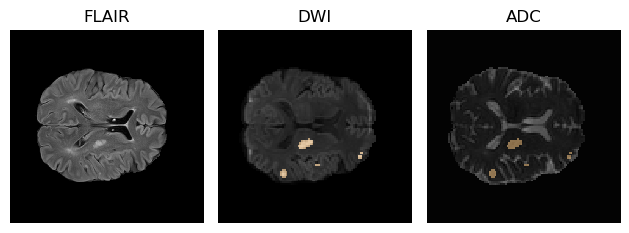

In [29]:
# Lets visualize the MR images with their corresponding mask overlays.

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# Show FLAIR image.
ax1.imshow(flair_image[:, :, 16], cmap="gray")
ax1.set_title("FLAIR")
ax1.set_axis_off()

slice2show = 40
# Show DWI image w/overlayed mask.
ax2.imshow(dwi_image[:, :, slice2show], cmap="gray")
ax2.imshow(mask_image[:, :, slice2show], alpha=0.5, cmap="copper")
ax2.set_title("DWI")
ax2.set_axis_off()

# Show ADC image w/overlayed mask.
ax3.imshow(adc_image[:, :, slice2show], cmap="gray")
ax3.imshow(mask_image[:, :, slice2show], alpha=0.5, cmap="copper")
ax3.set_title("ADC")
ax3.set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
# As an example, we'll segment the DWI using a 99th-percentile intensity cutoff.
dwi_cutoff = np.percentile(dwi_image[dwi_image > 0], 99)
segmented_image = dwi_image > dwi_cutoff

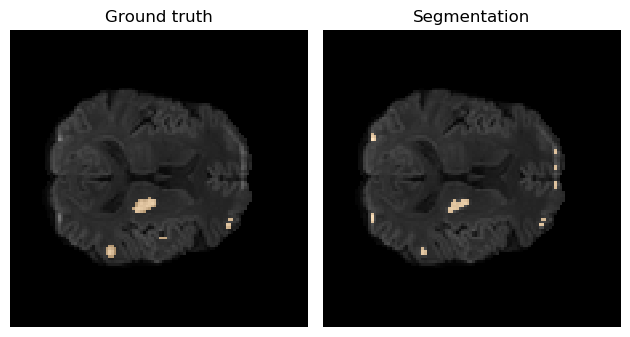

In [31]:
# Lets visualize the segmentation we've created.
# Show ground truth.
fig2, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(dwi_image[:, :, slice2show], cmap="gray")
ax1.imshow(mask_image[:, :, slice2show], alpha=0.5, cmap="copper")
ax1.set_title("Ground truth")
ax1.set_axis_off()

# Show predicted segmentation.
ax2.imshow(dwi_image[:, :, slice2show], cmap="gray")
ax2.imshow(segmented_image[:, :, slice2show], alpha=0.5, cmap="copper")
ax2.set_title("Segmentation")
ax2.set_axis_off()
plt.tight_layout()
plt.show()

In [36]:
voxel_volume = np.prod(nib.load(dwi_path).header.get_zooms()) / 1000  #

In [37]:
voxel_volume

0.008

In [32]:
# Compute performance metrics.
# Compute dice
print("Dice score: {}".format(eval_utils.compute_dice(mask_image, segmented_image)))

# Compute absolute volume difference
voxel_volume = np.prod(nib.load(dwi_path).header.get_zooms()) / 1000  # Get voxel volume
print(
    "Absolute volume difference: {} ml".format(
        eval_utils.compute_absolute_volume_difference(
            mask_image, segmented_image, voxel_volume
        )
    )
)

# Compute absolute lesion count difference
print(
    "Absolute lesion count difference: {} ".format(
        eval_utils.compute_absolute_lesion_difference(mask_image, segmented_image)
    )
)

# Compute F1-score (lesion-wise)
print(
    "Lesion-wise F1-score: {} ".format(
        eval_utils.compute_lesion_f1_score(mask_image, segmented_image)
    )
)

Dice score: 0.1738013698630137
Absolute volume difference: 10.32 ml
Absolute lesion count difference: 87 
Lesion-wise F1-score: 0.24793388429752067 
